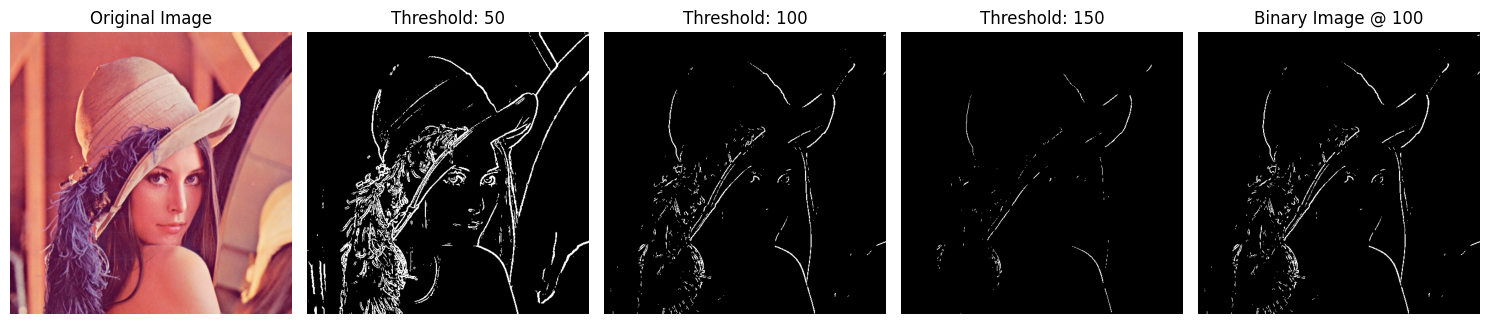

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to apply 2D convolution (from scratch)
def convolve_2d(image, kernel):
    output = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=kernel.shape[0]//2, mode='edge')  # Use 'edge' padding

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]])

    return output

# Function to apply Sobel X and Y detection and normalize the result
def sobel_edge_detection(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]])

    # Apply Sobel X and Y kernels
    Gx = convolve_2d(image, sobel_x)
    Gy = convolve_2d(image, sobel_y)

    # Compute gradient magnitude from Gx and Gy
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize the gradient magnitude for better visual contrast
    gradient_magnitude = (gradient_magnitude - gradient_magnitude.min()) / (gradient_magnitude.max() - gradient_magnitude.min()) * 255

    return gradient_magnitude.astype(np.uint8)

# Function to apply thresholding
def apply_threshold(image, threshold=100):
    """Apply binary thresholding to the gradient magnitude image."""
    binary_image = np.zeros_like(image)
    binary_image[image >= threshold] = 255
    return binary_image

# Function to display the original, thresholded images, and one binary edge image
def display_results(original_image, gradient_magnitude_image, thresholds, binary_threshold):
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, len(thresholds) + 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Display thresholded images
    for i, threshold in enumerate(thresholds):
        thresholded_image = apply_threshold(gradient_magnitude_image, threshold)
        plt.subplot(1, len(thresholds) + 2, i + 2)
        plt.title(f'Threshold: {threshold}')
        plt.imshow(thresholded_image, cmap='gray')
        plt.axis('off')

    # Display one binary edge image for the chosen binary threshold
    binary_image = apply_threshold(gradient_magnitude_image, binary_threshold)
    plt.subplot(1, len(thresholds) + 2, len(thresholds) + 2)
    plt.title(f'Binary Image @ {binary_threshold}')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply Sobel edge detection and compute the gradient magnitude
    gradient_magnitude_image = sobel_edge_detection(grayscale_image)

    # Define multiple threshold values for normal thresholded images
    thresholds = [50, 100, 150]  # Experiment with these values

    # Define a binary threshold value for the binary image
    binary_threshold = 100  # You can adjust this to any value you want

    # Display the original image, normal thresholded images, and one binary edge image
    display_results(image, gradient_magnitude_image, thresholds, binary_threshold)

if __name__ == "__main__":
    main()


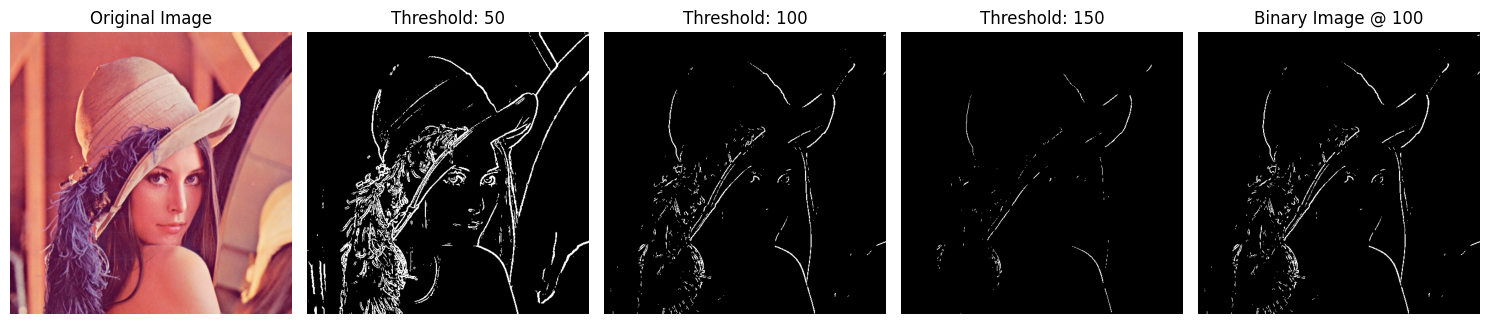

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to apply 2D convolution (from scratch)
def convolve_2d(image, kernel):
    output = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=kernel.shape[0]//2, mode='edge')  # Use 'edge' padding

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]])

    return output

# Function to apply Sobel X and Y detection and normalize the result
def sed(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]])

    # Apply Sobel X and Y kernels
    Gx = convolve_2d(image, sobel_x)
    Gy = convolve_2d(image, sobel_y)

    # Compute gradient magnitude from Gx and Gy
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize the gradient magnitude for better visual contrast
    gradient_magnitude = (gradient_magnitude - gradient_magnitude.min()) / (gradient_magnitude.max() - gradient_magnitude.min()) * 255

    return gradient_magnitude.astype(np.uint8)

# Function to apply thresholding
def apply_threshold(image, threshold=100):
    """Apply binary thresholding to the gradient magnitude image."""
    binary_image = np.zeros_like(image)
    binary_image[image >= threshold] = 255
    return binary_image

# Function to display the original, thresholded images, and one binary edge image
def display_results(original_image, gradient_magnitude_image, thresholds, binary_threshold):
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, len(thresholds) + 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Display thresholded images
    for i, threshold in enumerate(thresholds):
        thresholded_image = apply_threshold(gradient_magnitude_image, threshold)
        plt.subplot(1, len(thresholds) + 2, i + 2)
        plt.title(f'Threshold: {threshold}')
        plt.imshow(thresholded_image, cmap='gray')
        plt.axis('off')

    # Display one binary edge image for the chosen binary threshold
    binary_image = apply_threshold(gradient_magnitude_image, binary_threshold)
    plt.subplot(1, len(thresholds) + 2, len(thresholds) + 2)
    plt.title(f'Binary Image @ {binary_threshold}')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply Sobel edge detection and compute the gradient magnitude
    gradient_magnitude_image = sed(grayscale_image)

    # Define multiple threshold values for normal thresholded images
    thresholds = [50, 100, 150]  # Experiment with these values

    # Define a binary threshold value for the binary image
    binary_threshold = 100  # You can adjust this to any value you want

    # Display the original image, normal thresholded images, and one binary edge image
    display_results(image, gradient_magnitude_image, thresholds, binary_threshold)

if __name__ == "__main__":
    main()
